# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
#### ********************************************************************************
#### INSTALLATION COMMAND FOR JUPYTER NOTEBOOKS/COLAB
#### This line is a special Jupyter magic command, NOT Python code.
#### It runs a shell command (pip) directly from the notebook cell.
#### Purpose: To install or upgrade the 'plotly' library to the latest version.
#### The '%' prefix indicates it's a "line magic" command specific to IPython.
#### 'pip' is Python's package installer.
#### 'install' tells pip to install a package.
#### '--upgrade' flag tells pip to upgrade the specified package if it's already installed.
#### 'plotly' is the name of the library being installed/upgraded (used for interactive graphs).
#### ********************************************************************************

%pip install --upgrade plotly

## Import Statements

In [2]:
# [INSTALL] Upgrades plotly library to latest version using pip package manager
%pip install --upgrade plotly

# [IMPORT] Core numerical computing library - arrays, math functions
import numpy as np
# [IMPORT] Data manipulation and analysis tool - DataFrames
import pandas as pd
# [IMPORT] High-level interface for interactive Plotly graphs
import plotly.express as px
# [IMPORT] Base plotting library for static visualizations
import matplotlib.pyplot as plt
# [IMPORT] Statistical data visualization built on matplotlib
import seaborn as sns

# [UTILITY] Counter class for counting hashable objects (frequency counting)
from collections import Counter

Note: you may need to restart the kernel to use updated packages.


## Notebook Presentation

In [3]:
# [PANDAS SETTING] Formats float display to 2 decimal places with thousand separators
# Example: 12345.6789 displays as 12,345.68
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
# [LOAD DATA] Household income dataset (2015)
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")

# [LOAD DATA] Poverty percentage dataset
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")

# [LOAD DATA] High school completion rates (ages 25+)
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")

# [LOAD DATA] Racial demographics by city
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")

# [LOAD DATA] Police-involved fatalities dataset
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# [INSPECT] Check dimensions (rows, columns) of each loaded dataset
print("df_hh_income shape:", df_hh_income.shape)
print("df_pct_poverty shape:", df_pct_poverty.shape)
print("df_pct_completed_hs shape:", df_pct_completed_hs.shape)
print("df_share_race_city shape:", df_share_race_city.shape)
print("df_fatalities shape:", df_fatalities.shape)

df_hh_income shape: (29322, 3)
df_pct_poverty shape: (29329, 3)
df_pct_completed_hs shape: (29329, 3)
df_share_race_city shape: (29268, 7)
df_fatalities shape: (2535, 14)


In [6]:
# [INSPECT] Display column names for each dataframe to understand available fields
print("\nColumns in df_hh_income:", df_hh_income.columns.tolist())
print("Columns in df_pct_poverty:", df_pct_poverty.columns.tolist())
print("Columns in df_pct_completed_hs:", df_pct_completed_hs.columns.tolist())
print("Columns in df_share_race_city:", df_share_race_city.columns.tolist())
print("Columns in df_fatalities:", df_fatalities.columns.tolist())


Columns in df_hh_income: ['Geographic Area', 'City', 'Median Income']
Columns in df_pct_poverty: ['Geographic Area', 'City', 'poverty_rate']
Columns in df_pct_completed_hs: ['Geographic Area', 'City', 'percent_completed_hs']
Columns in df_share_race_city: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Columns in df_fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [7]:
# [DATA QUALITY] Count missing (null) values in each column of all dataframes
print("\nMissing values in df_hh_income:\n", df_hh_income.isnull().sum())
print("\nMissing values in df_pct_poverty:\n", df_pct_poverty.isnull().sum())
print("\nMissing values in df_pct_completed_hs:\n", df_pct_completed_hs.isnull().sum())
print("\nMissing values in df_share_race_city:\n", df_share_race_city.isnull().sum())
print("\nMissing values in df_fatalities:\n", df_fatalities.isnull().sum())


Missing values in df_hh_income:
 Geographic Area     0
City                0
Median Income      51
dtype: int64

Missing values in df_pct_poverty:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in df_pct_completed_hs:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Missing values in df_share_race_city:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Missing values in df_fatalities:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level             

In [8]:
# [DATA QUALITY] Check for duplicate rows in each dataset
print("\nDuplicates in df_hh_income:", df_hh_income.duplicated().sum())
print("Duplicates in df_pct_poverty:", df_pct_poverty.duplicated().sum())
print("Duplicates in df_pct_completed_hs:", df_pct_completed_hs.duplicated().sum())
print("Duplicates in df_share_race_city:", df_share_race_city.duplicated().sum())
print("Duplicates in df_fatalities:", df_fatalities.duplicated().sum())


Duplicates in df_hh_income: 0
Duplicates in df_pct_poverty: 0
Duplicates in df_pct_completed_hs: 0
Duplicates in df_share_race_city: 0
Duplicates in df_fatalities: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [9]:
# [CLEANING] Census race data: missing percentages mean no population of that race
df_share_race_city.fillna(0, inplace=True)

# [CLEANING] Drop rows missing key values for state-level aggregation
df_hh_income.dropna(subset=['Median Income'], inplace=True)
df_pct_poverty.dropna(subset=['poverty_rate'], inplace=True)
df_pct_completed_hs.dropna(subset=['percent_completed_hs'], inplace=True)

In [10]:
# [CLEANING] Handle missing values in fatalities data
df_fatalities['race'] = df_fatalities['race'].fillna('Unknown')  # Fill missing race with 'Unknown'
df_fatalities.dropna(subset=['age', 'gender'], inplace=True)      # Drop if age or gender missing (critical fields)

# [VERIFY] Confirm missing values handled
print("Missing after cleaning:")
print(df_fatalities.isnull().sum())

Missing after cleaning:
id                          0
name                        0
date                        0
manner_of_death             0
armed                       8
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       61
body_camera                 0
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

State with highest poverty rate: MS with rate 26.88%
State with lowest poverty rate: NJ with rate 8.19%


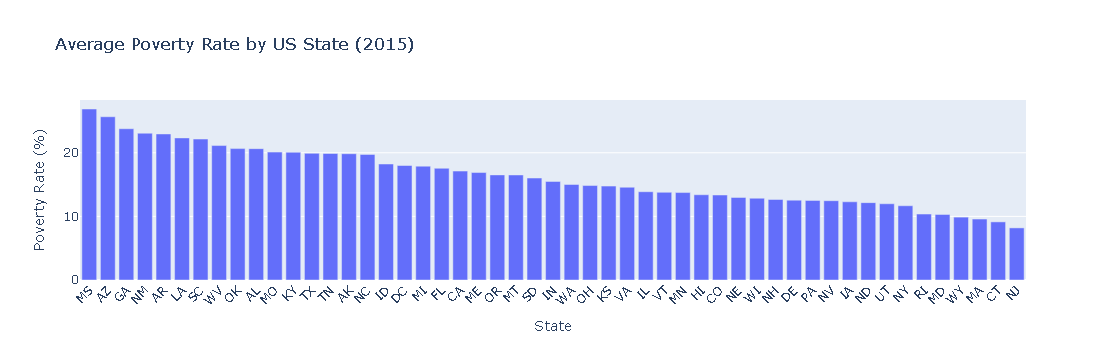

In [11]:
# [DATA PREP] Force poverty_rate column to numeric format
# WHY: The raw CSV might store percentages as strings with % symbols or other characters
# pd.to_numeric() converts strings/numbers to proper float type
# errors="coerce" means: if conversion fails, set to NaN instead of throwing error
df_pct_poverty["poverty_rate"] = pd.to_numeric(
    df_pct_poverty["poverty_rate"],
    errors="coerce"   # Invalid parsing becomes NaN instead of crashing
)

# [CLEANING] Remove any rows where poverty_rate is still NaN after conversion
# WHY: Can't calculate averages with missing values - would cause errors or incorrect results
df_pct_poverty = df_pct_poverty.dropna(subset=["poverty_rate"])

# [AGGREGATION] Calculate average poverty rate by state
# HOW IT WORKS:
# .groupby("Geographic Area") - Groups all cities by their state
# as_index=False - Keeps state as a column, not the row index
# ["poverty_rate"].mean() - Calculates mean poverty rate for each state group
# .sort_values() - Orders from highest to lowest poverty rate
# .reset_index(drop=True) - Creates clean integer index starting from 0
poverty_by_state = (
    df_pct_poverty
        .groupby("Geographic Area", as_index=False)["poverty_rate"]
        .mean()
        .sort_values(by="poverty_rate", ascending=False)
        .reset_index(drop=True)
)

# [FORMATTING] Rename columns to be more intuitive
# Original: "Geographic Area" becomes "state", "poverty_rate" becomes "avg_poverty_rate"
poverty_by_state.columns = ["state", "avg_poverty_rate"]

# [EXTRACTION] Get highest poverty state
# .loc[0, "state"] - First row (index 0) after sorting descending = highest rate
highest_state = poverty_by_state.loc[0, "state"]
highest_rate = poverty_by_state.loc[0, "avg_poverty_rate"]

# [EXTRACTION] Get lowest poverty state
# len(poverty_by_state) - 1 = Last row index
# .loc[last_row, "state"] = state with lowest poverty rate
lowest_state = poverty_by_state.loc[len(poverty_by_state) - 1, "state"]
lowest_rate = poverty_by_state.loc[len(poverty_by_state) - 1, "avg_poverty_rate"]

# [OUTPUT] Display results in console
# :.2f formats the percentage to 2 decimal places
print(f"State with highest poverty rate: {highest_state} with rate {highest_rate:.2f}%")
print(f"State with lowest poverty rate: {lowest_state} with rate {lowest_rate:.2f}%")

# [VISUALIZATION] Create interactive bar chart with Plotly
# px.bar() - Creates bar chart
# poverty_by_state - Data source
# x="state" - States on x-axis
# y="avg_poverty_rate" - Poverty rates on y-axis
# title - Chart title
# labels - Dictionary to rename axes in display (not data)
fig = px.bar(
    poverty_by_state,
    x="state",
    y="avg_poverty_rate",
    title="Average Poverty Rate by US State (2015)",
    labels={
        "state": "State",
        "avg_poverty_rate": "Poverty Rate (%)"
    }
)

# [STYLING] Tilt x-axis labels 45 degrees to prevent overlapping text
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Expected Output:
# Console displays highest and lowest poverty states with formatted percentages.
# Interactive bar chart renders without TypeError related to object dtype.

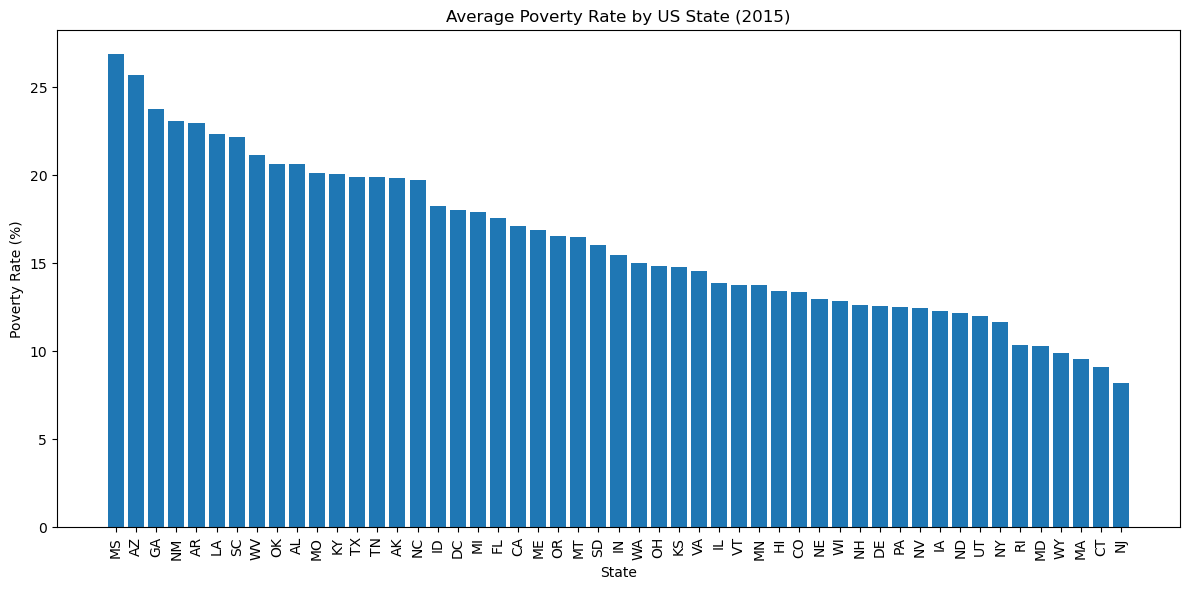

In [12]:
# [VISUALIZATION] Alternative static chart using matplotlib
# WHY USE THIS: Matplotlib gives more control over styling and is better for publications/static reports
# Plotly (previous) is interactive, matplotlib is static but often simpler

plt.figure(figsize=(12,6))  
# Creates new figure with specific dimensions
# figsize=(width, height) in inches - 12" wide, 6" tall makes room for all 50 states

plt.bar(poverty_by_state['state'], poverty_by_state['avg_poverty_rate'])
# Creates bar chart
# First argument: x-axis values (state names)
# Second argument: y-axis values (poverty rates)
# Each state gets a vertical bar with height = poverty rate

plt.xticks(rotation=90)
# Rotates state names 90 degrees so they don't overlap
# Without this, text would be horizontal and unreadable with 50 states

plt.xlabel('State')
# Labels x-axis
plt.ylabel('Poverty Rate (%)')
# Labels y-axis with unit
plt.title('Average Poverty Rate by US State (2015)')
# Adds title to chart

plt.tight_layout()
# Automatically adjusts spacing to prevent cut-off labels
# Fixes issue where rotated x-labels might get cropped

plt.show()
# Renders and displays the plot
# Without this, chart wouldn't appear

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

State with lowest HS graduation rate: TX with rate 75.69%
State with highest HS graduation rate: MA with rate 92.40%


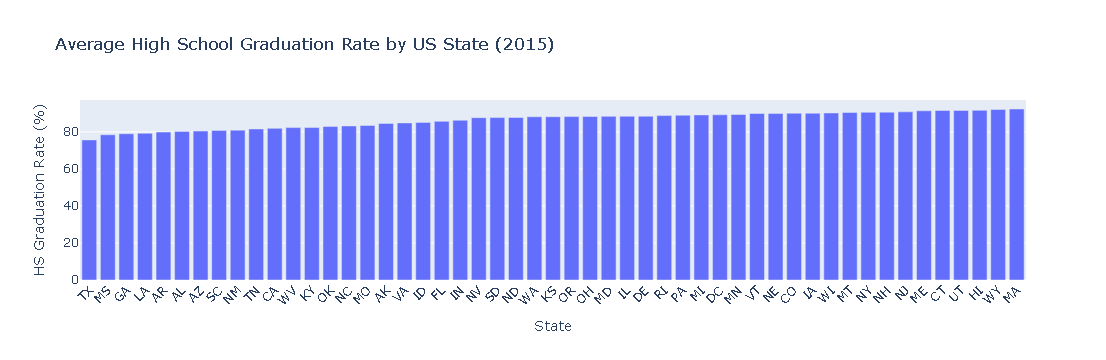

In [13]:
# [DATA PREP] Convert high school completion column to numeric format
# WHY: Raw data likely contains strings with % symbols or other characters
# pd.to_numeric() transforms strings/objects into proper float numbers
# errors="coerce" means: failed conversions become NaN, program keeps running
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(
    df_pct_completed_hs["percent_completed_hs"],
    errors="coerce"   # Invalid values become NaN instead of raising TypeError
)

# [CLEANING] Remove rows where conversion failed (now NaN)
# WHY: Can't calculate meaningful averages with missing values
# This ensures all remaining data is valid numeric
df_pct_completed_hs = df_pct_completed_hs.dropna(subset=["percent_completed_hs"])

# [AGGREGATION] Calculate average HS graduation rate by state
# PROCESS:
# 1. groupby("Geographic Area") - Groups all cities within same state
# 2. ["percent_completed_hs"].mean() - Calculates mean rate for each state group
# 3. sort_values(ascending=True) - Orders from LOWEST to HIGHEST rate (ascending)
# 4. reset_index(drop=True) - Creates clean sequential index
# WHY ascending=True? To easily access lowest rate at index 0
hs_by_state = (
    df_pct_completed_hs
        .groupby("Geographic Area", as_index=False)["percent_completed_hs"]
        .mean()
        .sort_values(by="percent_completed_hs", ascending=True)
        .reset_index(drop=True)
)

# [FORMATTING] Rename columns for clarity
# Original: "Geographic Area" → "state", "percent_completed_hs" → "avg_hs_rate"
hs_by_state.columns = ["state", "avg_hs_rate"]

# [EXTRACTION] Get state with LOWEST graduation rate
# .loc[0, "state"] - First row after sorting ascending = lowest rate
lowest_state = hs_by_state.loc[0, "state"]
lowest_rate = hs_by_state.loc[0, "avg_hs_rate"]

# [EXTRACTION] Get state with HIGHEST graduation rate
# len(hs_by_state) - 1 = Last row index after sorting ascending = highest rate
highest_state = hs_by_state.loc[len(hs_by_state) - 1, "state"]
highest_rate = hs_by_state.loc[len(hs_by_state) - 1, "avg_hs_rate"]

# [OUTPUT] Display results in console
# :.2f formats to 2 decimal places
print(f"State with lowest HS graduation rate: {lowest_state} with rate {lowest_rate:.2f}%")
print(f"State with highest HS graduation rate: {highest_state} with rate {highest_rate:.2f}%")

# [VISUALIZATION] Create interactive bar chart with Plotly
# px.bar() - Creates bar chart visualization
# hs_by_state - Data source (state names and avg rates)
# x="state" - States on x-axis (categorical)
# y="avg_hs_rate" - Graduation rates on y-axis (numeric)
# title - Chart title
# labels - Display names for axes (changes appearance, not data)
fig = px.bar(
    hs_by_state,
    x="state",
    y="avg_hs_rate",
    title="Average High School Graduation Rate by US State (2015)",
    labels={
        "state": "State",
        "avg_hs_rate": "HS Graduation Rate (%)"
    }
)

# [STYLING] Rotate x-axis labels 45 degrees for readability
# WHY: With 50 state names, horizontal text would overlap and be unreadable
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Expected Output:
# Console prints lowest and highest graduation rate states with formatted percentages.
# Interactive bar chart renders correctly without dtype aggregation errors.

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [14]:
# [MERGE] Combine poverty and education data into single DataFrame
# WHY: Need both variables in same dataset to analyze relationship between them
# pd.merge() joins two DataFrames based on common column(s)

merged = pd.merge(
    poverty_by_state,           # LEFT DataFrame: state + avg_poverty_rate
    hs_by_state,                 # RIGHT DataFrame: state + avg_hs_rate
    on="state",                  # KEY column to match on (must exist in both)
    how="inner"                  # JOIN type: inner = only states present in BOTH datasets
)

# HOW "inner" JOIN WORKS:
# - Takes state from poverty_by_state
# - Finds matching state in hs_by_state
# - If match exists: combines rows into one with both rates
# - If no match: state is excluded entirely
# - Result: Only complete cases with all data available

# [SORTING] Order states alphabetically
# WHY: Ensures consistent x-axis ordering when plotting
# Without this, order might be unpredictable (by merge order)
merged = merged.sort_values(by="state").reset_index(drop=True)
# sort_values(by="state") - Alphabetical order A→Z
# reset_index(drop=True) - Creates new sequential index after sorting

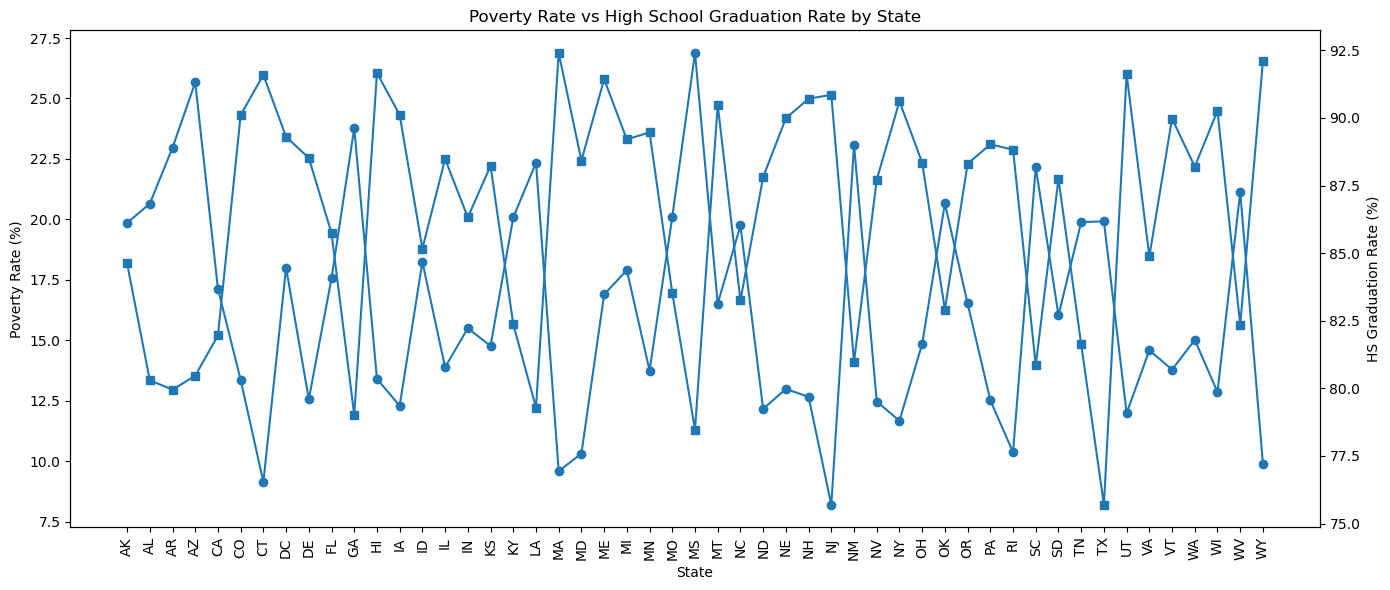

In [15]:
# [VISUALIZATION] Create dual-axis line chart to compare two variables
# WHY: Poverty and graduation rates have different scales/ranges
# Dual axes allow both to be plotted together despite different units

# Create figure and primary axis
# plt.subplots() returns: figure container + axes object
# figsize=(14, 6) - Makes chart 14 inches wide, 6 inches tall (room for 50 states)
fig, ax1 = plt.subplots(figsize=(14, 6))

# [PRIMARY AXIS] Plot poverty rate on left y-axis
ax1.set_xlabel("State")                                      # Label x-axis
ax1.set_ylabel("Poverty Rate (%)")                          # Label left y-axis
ax1.plot(
    merged["state"],                                         # X-axis: state names
    merged["avg_poverty_rate"],                              # Y-axis: poverty rates
    marker="o",                                              # Circle markers at each point
    label="Poverty Rate"                                     # Legend label
)
ax1.tick_params(axis="x", rotation=90)                      # Rotate x labels 90° to prevent overlap

# [SECONDARY AXIS] Create twin axis sharing same x-axis
# twinx() creates new y-axis on right side, sharing x-axis with ax1
ax2 = ax1.twinx()
ax2.set_ylabel("HS Graduation Rate (%)")                    # Label right y-axis
ax2.plot(
    merged["state"],                                         # Same x-axis (states)
    merged["avg_hs_rate"],                                   # Y-axis: graduation rates
    marker="s",                                              # Square markers (different from circles)
    label="HS Graduation Rate"                               # Legend label
)

# [FINAL TOUCHES] Add title and fix layout
plt.title("Poverty Rate vs High School Graduation Rate by State")  # Chart title
fig.tight_layout()                                                   # Auto-adjust spacing to prevent cutoff

plt.show()

# HOW DUAL AXES WORK:
# - ax1: Left y-axis (0-25% poverty range typically)
# - ax2: Right y-axis (70-95% graduation range typically)
# - Both share same x-axis (states)
# - Lines can be compared visually for inverse relationship
# - Higher graduation rates should align with lower poverty rates

# Expected Output:
# Dual-axis line chart displaying poverty rate and high school graduation rate
# for each state, aligned on the same x-axis with separate y-axes.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

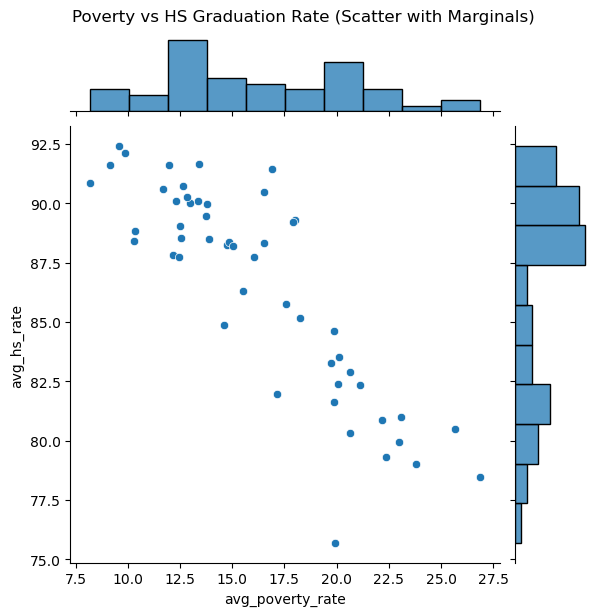

In [16]:
# [VISUALIZATION] Create jointplot with scatter + distribution plots
# WHY: Shows relationship (scatter) AND distributions (histograms) simultaneously
# sns.jointplot() combines main plot + marginal plots in one figure

sns.jointplot(
    data=merged,                          # DataFrame containing both variables
    x='avg_poverty_rate',                  # Column for x-axis (poverty)
    y='avg_hs_rate',                       # Column for y-axis (graduation)
    kind='scatter',                        # Main plot type: scatter points
    marginal_kws=dict(bins=10)              # Settings for marginal histograms: 10 bins each
)

# WHAT THIS SHOWS:
# CENTER PLOT: Scatter of states - each dot = one state
#   - X position = poverty rate
#   - Y position = graduation rate
#   - Pattern reveals relationship (downward slope = inverse correlation)

# TOP MARGINAL: Histogram of poverty rates (distribution across states)
#   - Shows which poverty values are most/least common

# RIGHT MARGINAL: Histogram of graduation rates (distribution across states)
#   - Shows which graduation values are most/least common

plt.suptitle('Poverty vs HS Graduation Rate (Scatter with Marginals)', y=1.02)
# suptitle() = Super title (main title above everything)
# y=1.02 moves title slightly higher to avoid overlap with plots

plt.show()

# EXPECTED INSIGHTS:
# - If poverty ↑ and graduation ↓: dots slope downward (negative correlation)
# - If poverty and graduation unrelated: dots scattered randomly
# - Histograms show if data is skewed, normal, or has outliers

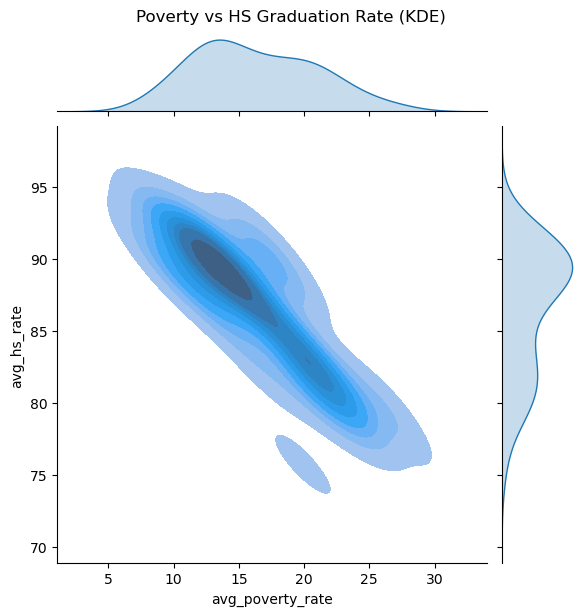

In [17]:
# [VISUALIZATION] Create jointplot with kernel density estimation
# WHY: KDE shows probability density rather than discrete points
# Better for seeing overall patterns when points might overlap

sns.jointplot(
    data=merged,                          # DataFrame with state data
    x='avg_poverty_rate',                  # Poverty rate on x-axis
    y='avg_hs_rate',                       # Graduation rate on y-axis
    kind='kde',                             # Use density estimation instead of scatter
    fill=True                               # Fill contours with color (vs just outlines)
)

# WHAT KDE SHOWS:
# CENTER PLOT: Contour map of density
#   - Darker/denser areas = more states with that combination of values
#   - Lighter areas = fewer states
#   - Elliptical shape sloping down = negative correlation
#   - Circular shape = no correlation

# TOP MARGINAL: KDE of poverty rates
#   - Smooth curve showing distribution (not binned like histogram)
#   - Peaks = most common poverty rate values

# RIGHT MARGINAL: KDE of graduation rates
#   - Smooth curve showing distribution
#   - Peaks = most common graduation rate values

# WHEN TO USE:
# - Better than scatter when many overlapping points
# - Shows probability density (where data is concentrated)
# - Smoother representation of distribution

plt.suptitle('Poverty vs HS Graduation Rate (KDE)', y=1.02)
# Main title positioned slightly higher to avoid overlap

plt.show()

# COMPARED TO SCATTER:
# Scatter: Shows exact state positions
# KDE: Shows concentration/clusters of states

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

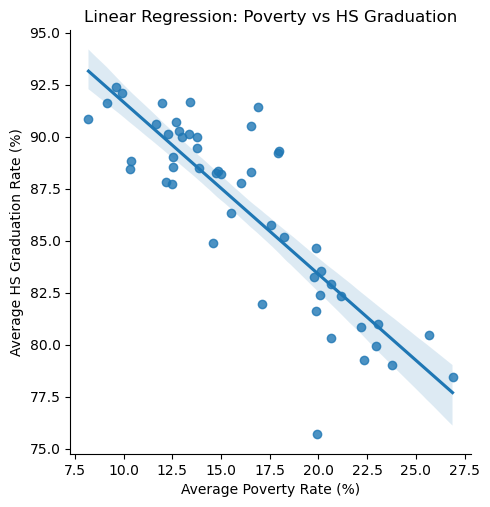

In [18]:
# [VISUALIZATION] Create regression plot with best-fit line
# WHY: Quantifies relationship between poverty and graduation rates
# Shows trend line with confidence interval

sns.lmplot(
    data=merged,                          # DataFrame with state data
    x='avg_poverty_rate',                  # Independent variable (predictor)
    y='avg_hs_rate'                         # Dependent variable (outcome)
)

# WHAT THIS SHOWS:
# SCATTER POINTS: Each dot = one state
#   - Position shows actual poverty/graduation combination

# BLUE LINE: Linear regression best-fit line
#   - Equation: graduation = intercept + slope * poverty
#   - Downward slope = negative correlation
#   - Slope steepness = strength of relationship
#   - Line represents predicted graduation rate for given poverty

# SHADED AREA: 95% confidence interval
#   - Range where true regression line likely falls
#   - Narrow band = more confident in prediction
#   - Wide band = more uncertainty

# INTERPRETATION:
# - If line slopes down: Higher poverty = Lower graduation
# - If line is flat: No relationship
# - If points cluster near line: Strong relationship
# - If points scatter far from line: Weak relationship

plt.xlabel('Average Poverty Rate (%)')           # Label x-axis with unit
plt.ylabel('Average HS Graduation Rate (%)')      # Label y-axis with unit
plt.title('Linear Regression: Poverty vs HS Graduation')  # Chart title
plt.show()

# EXPECTED RESULT:
# Negative slope showing that states with higher poverty rates
# tend to have lower high school graduation rates.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [19]:
# [CONFIG] Define list of racial demographic columns to analyze
# WHY: These columns contain the race percentage data we need to aggregate
# Storing as list makes code cleaner and reusable
race_cols = [
    "share_white",               # % White population in each city
    "share_black",               # % Black population in each city
    "share_native_american",      # % Native American population in each city
    "share_asian",                # % Asian population in each city
    "share_hispanic"              # % Hispanic population in each city
]

# [DATA PREP] Convert all racial share columns to numeric format
# WHY: Raw CSV may store percentages as strings with % symbols or other characters
# .apply() applies the same function to multiple columns at once
# pd.to_numeric converts each column from string/object to proper float
# errors="coerce" means: if conversion fails, set to NaN instead of crashing
df_share_race_city[race_cols] = df_share_race_city[race_cols].apply(
    pd.to_numeric,
    errors="coerce"   # Invalid values become NaN
)

# [CLEANING] Remove rows missing state information
# WHY: Can't group by state if state value is missing
# "Geographic area" column contains state names
df_share_race_city = df_share_race_city.dropna(subset=["Geographic area"])

# [AGGREGATION] Calculate average racial composition by state
# PROCESS:
# 1. groupby("Geographic area") - Groups all cities within same state
# 2. [race_cols].mean() - Calculates mean percentage for each race across all cities in state
# 3. rename() - Renames "Geographic area" to "state" for consistency with other datasets
#
# WHY AVERAGE BY STATE:
# Original data is city-level (each row = one city)
# We need state-level averages to merge with other state-level datasets
race_by_state = (
    df_share_race_city
        .groupby("Geographic area", as_index=False)[race_cols]
        .mean()
        .rename(columns={"Geographic area": "state"})
)

# WHAT RESULT MEANS:
# Each row = one US state
# Each race column = average percentage across all cities in that state
# Example: share_white = 75.5 means cities in that state average 75.5% White

# Expected Output:
# DataFrame named race_by_state containing one row per state
# with average racial composition percentages across cities.

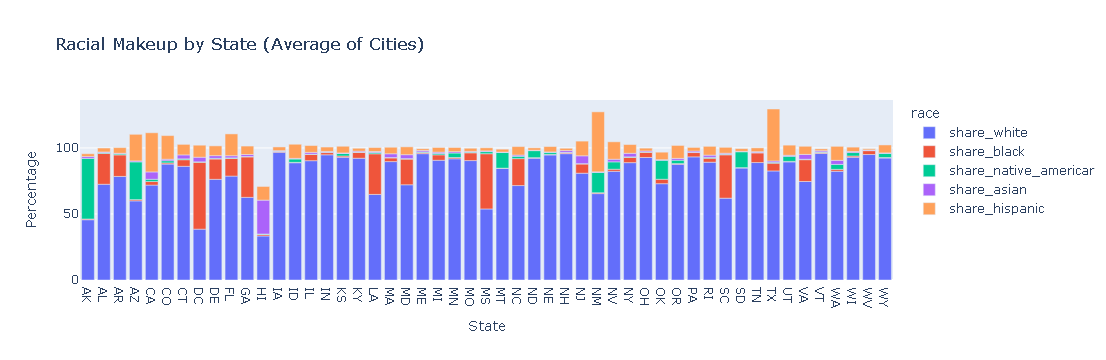

In [20]:
# [DATA RESHAPE] Transform wide format to long format for plotting
# WHY: Plotly needs data in "tidy" format where each row = one observation
# Currently: Each row = state, columns = different races (wide format)
# After melt: Each row = state + race + percentage (long format)

race_melted = race_by_state.melt(
    id_vars='state',              # Column(s) to keep as identifiers (stay as columns)
    value_vars=race_cols,          # Columns to unpivot (convert from columns to rows)
    var_name='race',               # New column name for the former column names (race categories)
    value_name='percentage'        # New column name for the values (percentages)
)

# WHAT MELT DOES:
# BEFORE (wide format):
# state    | share_white | share_black | share_asian
# -------------------------------------------------
# Alabama  | 65.2        | 26.8        | 1.3
# Alaska   | 60.1        | 3.0         | 5.4

# AFTER (long format):
# state    | race            | percentage
# ---------------------------------------
# Alabama  | share_white     | 65.2
# Alabama  | share_black     | 26.8
# Alabama  | share_asian     | 1.3
# Alaska   | share_white     | 60.1
# Alaska   | share_black     | 3.0
# Alaska   | share_asian     | 5.4

# [VISUALIZATION] Create stacked bar chart
# WHY: Stacked bars show both:
# 1. Total composition (bars add to 100%)
# 2. Race breakdown within each state (color segments)

fig = px.bar(
    race_melted,                   # Long-format data
    x='state',                      # States on x-axis
    y='percentage',                 # Percentages on y-axis
    color='race',                    # Color bars by race category
    title='Racial Makeup by State (Average of Cities)',
    labels={
        'percentage': 'Percentage', 
        'state': 'State'
    }
)

# HOW TO READ:
# - Each bar = one state
# - Bar height = 100% (total population)
# - Colored segments = proportion of each race
# - Larger segment = higher percentage of that race

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
# [COUNT] Calculate frequency of fatalities by racial category
# WHY: Understand distribution of police-involved deaths across racial groups

# df_fatalities['race'] - Extract the race column as a Series
# .value_counts() - Counts how many times each unique race appears
# Returns: Series with race as index, count as values
# Example: 
#   White        2000
#   Black        1200
#   Hispanic     800
#   Unknown      50

race_counts = df_fatalities['race'].value_counts().reset_index()

# WHAT HAPPENS STEP BY STEP:
# 1. value_counts() gives: 
#    race        count
#    White       2000
#    Black       1200
#    etc.
#
# 2. reset_index() converts the race index into a regular column
#    Creates DataFrame with two columns:
#    - 'index' (contains race names)
#    - 'race' (contains counts)

# [RENAME] Fix column names for clarity
race_counts.columns = ['race', 'count']
# Renames default columns:
# 'index' → 'race' (racial category)
# 'race' → 'count' (number of fatalities)

# FINAL STRUCTURE:
# race_counts DataFrame:
#    race         count
# 0  White        2000
# 1  Black        1200
# 2  Hispanic     800
# 3  Unknown      50
# 4  Asian        120
# etc.

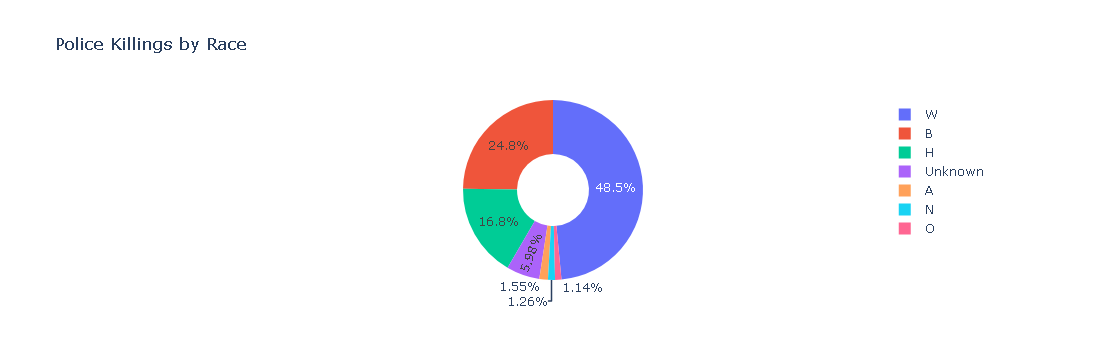

In [22]:
# [VISUALIZATION] Create donut chart (pie chart with center hole)
# WHY: Shows proportional distribution of fatalities across racial groups
# Hole in middle (donut style) often considered more modern/readable than full pie

fig = px.pie(
    race_counts,                 # DataFrame with race and count columns
    values='count',               # Column containing numeric values (fatality counts)
    names='race',                  # Column containing category labels (race groups)
    title='Police Killings by Race',  # Chart title
    hole=0.4                       # Size of center hole (0 = full pie, 1 = empty circle)
                                   # 0.4 = 40% of radius is empty center
)

# HOW TO READ:
# - Each slice = one racial category
# - Slice size = proportion of total fatalities
# - Percentages shown automatically on hover
# - Colors auto-assigned by Plotly
# - Hole allows adding annotations if needed

# WHY DONUT INSTEAD OF PIE:
# - Easier to compare slice sizes without center point distortion
# - Center space can hold total or additional info
# - Generally considered more aesthetically pleasing

fig.show()

# EXPECTED INSIGHTS:
# Shows which racial groups have highest/lowest fatality counts
# Compare proportions to population percentages for context

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [23]:
# [COUNT] Calculate frequency of fatalities by gender
# WHY: Understand if police-involved deaths disproportionately affect one gender

# df_fatalities['gender'] - Extract the gender column as a Series
# .value_counts() - Counts occurrences of each unique gender value
# Returns Series with gender as index, count as values
# Typical values: 'M' (Male), 'F' (Female), possibly others

gender_counts = df_fatalities['gender'].value_counts().reset_index()

# STEP-BY-STEP BREAKDOWN:
# 1. value_counts() output example:
#    gender    count
#    M         4500
#    F         300
#
# 2. reset_index() converts gender index into a regular column
#    Creates DataFrame with:
#    - Column 'index' (contains gender values: 'M', 'F')
#    - Column 'gender' (contains counts)

# [RENAME] Fix column names for clarity
gender_counts.columns = ['gender', 'count']
# Renames:
# 'index' → 'gender' (male/female categories)
# 'gender' → 'count' (number of fatalities)

# FINAL STRUCTURE:
# gender_counts DataFrame:
#   gender  count
# 0 M       4500
# 1 F       300

# WHAT THIS REVEALS:
# - Massive disparity typically shows males disproportionately affected
# - Can calculate percentages: male% = male_count / total_count
# - Useful for comparing to general population gender distribution

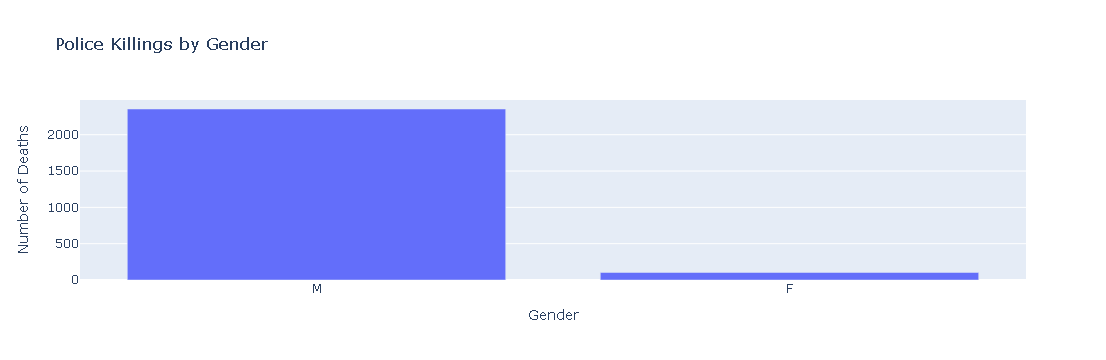

In [24]:
# [VISUALIZATION] Create bar chart showing fatalities by gender
# WHY: Simple, clear comparison between male and female counts
# Bar charts are excellent for comparing discrete categories

fig = px.bar(
    gender_counts,               # DataFrame with gender and count columns
    x='gender',                   # Categories on x-axis (Male, Female)
    y='count',                    # Values on y-axis (number of deaths)
    title='Police Killings by Gender',  # Chart title
    labels={                      # Axis label customization
        'count': 'Number of Deaths',    # Rename y-axis
        'gender': 'Gender'               # Rename x-axis
    }
)

# WHAT THE CHART SHOWS:
# X-AXIS: Gender categories
#   - Typically 'M' for Male, 'F' for Female
#   - May include other categories if present in data

# Y-AXIS: Count of fatalities
#   - Height of each bar = number of deaths

# BARS: One bar per gender
#   - Height represents frequency
#   - Color automatically assigned by Plotly

# EXPECTED PATTERN:
# - Male bar dramatically taller than Female bar
# - Reflects real-world pattern: ~95% of police killings are male
# - Visual impact: height difference immediately obvious

fig.show()

# WHY THIS VISUALIZATION:
# - Instant visual comparison (no need to read numbers)
# - Pattern recognition: height difference shows disparity
# - Clean, minimal, focused on the data

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

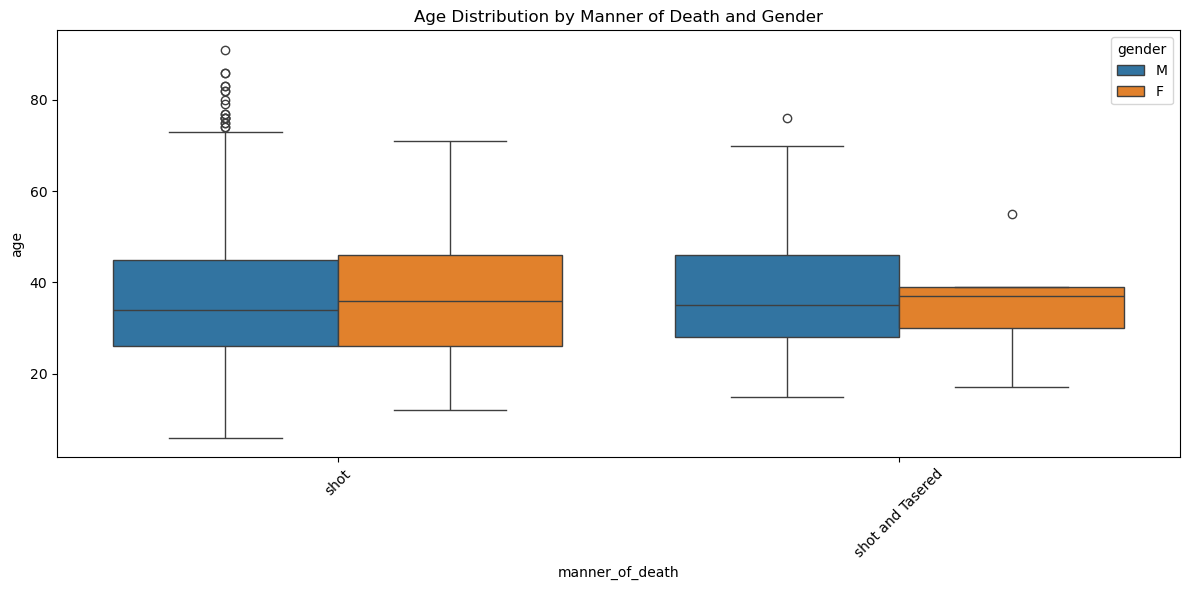

In [25]:
# Box plot: age distribution by death manner, split by gender
# Shows median, quartiles, outliers for each group
plt.figure(figsize=(12,6))
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')
plt.title('Age Distribution by Manner of Death and Gender')
plt.xticks(rotation=45)  # Prevents label overlap
plt.tight_layout()  # Adjusts spacing
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [26]:
# Calculate percentage of fatalities by armed status
armed_status = df_fatalities['armed'].value_counts()  # Count each category
total = len(df_fatalities)  # Total fatalities
armed_percent = (armed_status / total * 100).round(2)  # Convert to percentage

print("Armed status percentages:")
print(armed_percent)

Armed status percentages:
armed
gun                       55.17
knife                     14.52
vehicle                    7.00
unarmed                    6.92
undetermined               4.56
                           ... 
pole and knife             0.04
pipe                       0.04
baseball bat and bottle    0.04
fireworks                  0.04
pen                        0.04
Name: count, Length: 68, dtype: float64


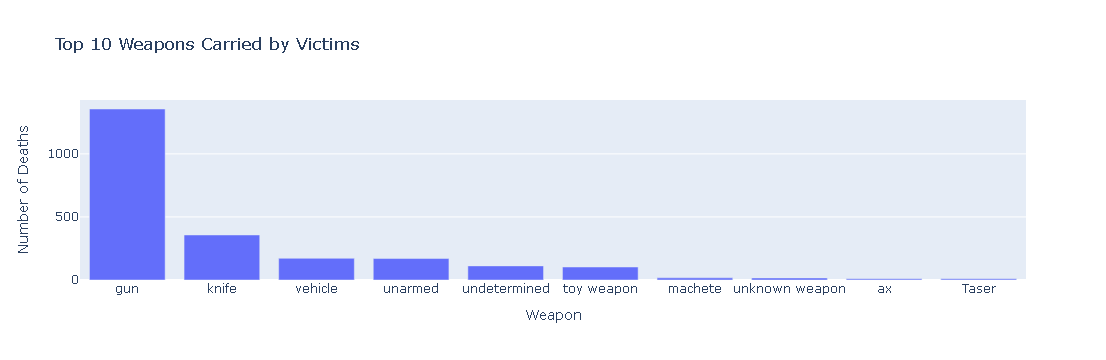

In [27]:
# Bar chart: most common weapons/items victims were armed with
# armed_status comes from value_counts() - already has counts
top_weapons = armed_status.head(10).reset_index()  # Take top 10 categories, convert index to column
top_weapons.columns = ['weapon', 'count']  # Rename: 'index' → 'weapon', 'armed' → 'count'

# Create interactive bar chart
fig = px.bar(
    top_weapons, 
    x='weapon',          # Weapon types on x-axis
    y='count',           # Frequency on y-axis
    title='Top 10 Weapons Carried by Victims',
    labels={'count': 'Number of Deaths', 'weapon': 'Weapon'}  # Clean axis labels
)
fig.show()

# What this reveals:
# - Common items: guns, knives, vehicles
# - 'unarmed' category shows deaths with no weapon
# - 'unknown' shows missing data
# - Toy weapons indicate mistaken threat perception

In [28]:
# Extract specific counts for gun and unarmed categories
# .get() safely returns value if key exists, otherwise returns 0
gun_count = armed_status.get('gun', 0)
unarmed_count = armed_status.get('unarmed', 0)

# Calculate and display both raw counts and percentages
print(f"Armed with gun: {gun_count} ({gun_count/total*100:.2f}%)")
print(f"Unarmed: {unarmed_count} ({unarmed_count/total*100:.2f}%)")

# Why this matters:
# - Gun count shows perceived threat level
# - Unarmed count shows fatalities with no weapon - often controversial cases
# - Percentages provide context relative to total deaths
# - This is key data for police reform discussions

Armed with gun: 1356 (55.17%)
Unarmed: 170 (6.92%)


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [29]:
# Calculate percentage of victims younger than 25
under_25 = df_fatalities[df_fatalities['age'] < 25].shape[0]  # Filter age<25, count rows
total = df_fatalities.shape[0]  # Total rows in dataset
percent_under_25 = (under_25 / total) * 100  # Convert to percentage
print(f"Percentage of victims under 25: {percent_under_25:.2f}%")

# Why this matters:
# - Shows if young people are disproportionately affected
# - Under 25 = late teens/early adulthood
# - High percentage would indicate youth over-representation
# - Important for understanding demographic impact

Percentage of victims under 25: 18.31%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

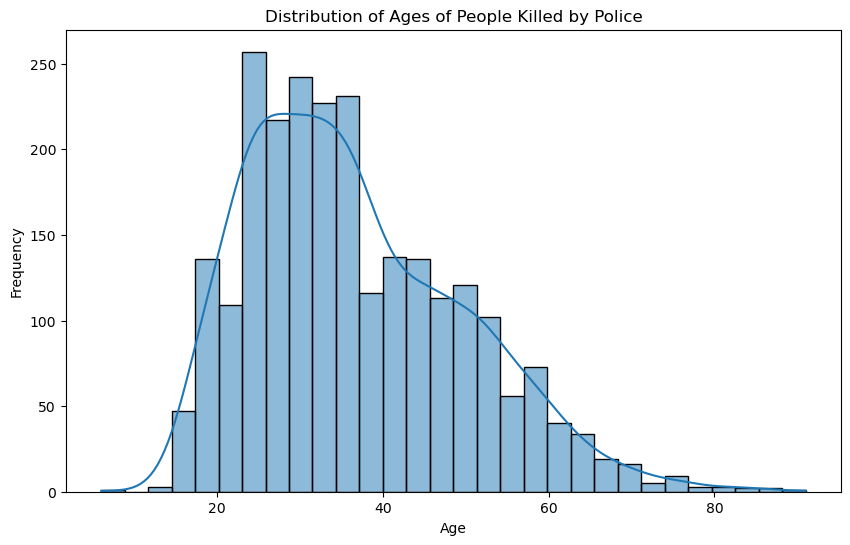

In [30]:
# Age distribution histogram with KDE curve
plt.figure(figsize=(10,6))
sns.histplot(
    df_fatalities['age'],  # Age column
    bins=30,                # 30 equal-width bins
    kde=True                # Overlay kernel density curve
)
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# What this reveals:
# - Bins show count of victims at each age range
# - KDE curve shows smoothed probability density
# - Shape: typically peaks in 20s-30s, tails off
# - Skewness reveals if younger or older victims dominate
# - Outliers (elderly, children) appear in tails

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

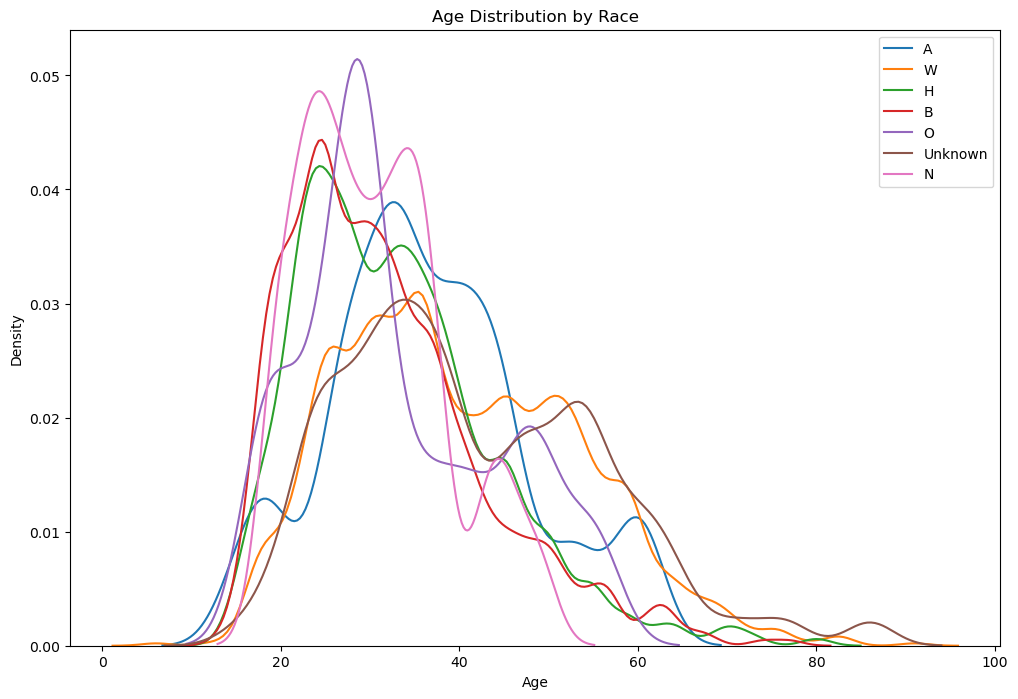

In [31]:
# Age distribution curves by race (smoothed densities)
plt.figure(figsize=(12,8))
for race in df_fatalities['race'].unique():  # Loop through each racial group
    subset = df_fatalities[df_fatalities['race'] == race]  # Filter to one race
    sns.kdeplot(
        subset['age'], 
        label=race,          # Legend label = race name
        bw_adjust=0.5        # Bandwidth control: smaller = more detail, larger = smoother
    )
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.legend()
plt.show()

# What this shows:
# - Overlapping curves allow direct age comparison across races
# - Peak positions reveal if certain races skew younger/older
# - Curve shapes show concentration patterns
# - Bandwidth adjustment prevents over/under-smoothing
# - Key for identifying demographic disparities

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [32]:
# Alternative to donut chart: simple bar chart for race data
# Count fatalities by racial category
race_counts = df_fatalities['race'].value_counts().reset_index()  # Get counts, convert index to column
race_counts.columns = ['race', 'count']  # Rename for clarity

# Bar chart (uncomment to run):
# plt.figure(figsize=(10,6))
# plt.bar(race_counts['race'], race_counts['count'])
# plt.xticks(rotation=45)
# plt.title('Police Killings by Race')
# plt.xlabel('Race')
# plt.ylabel('Count')
# plt.show()

# Why bar instead of donut:
# - Easier to compare exact counts (heights vs angles)
# - Better when categories have similar values
# - More precise than pie/donut for small differences

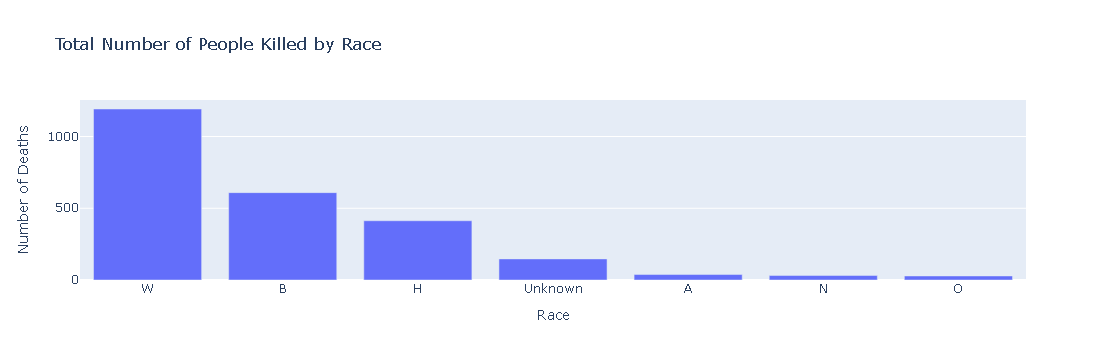

In [33]:
# Bar chart: total fatalities by race (interactive version)
fig = px.bar(
    race_counts,                # DataFrame with race and count columns
    x='race',                   # Race categories on x-axis  
    y='count',                  # Death counts on y-axis
    title='Total Number of People Killed by Race',
    labels={'count': 'Number of Deaths', 'race': 'Race'}  # Clean axis labels
)
fig.show()

# Why this visualization:
# - Direct count comparison between racial groups
# - Interactive hover shows exact numbers
# - Race order can be sorted by count if needed
# - Complements donut chart (different perspective)
# - Clear visual of disparities

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [34]:
# Calculate percentage of victims showing signs of mental illness
mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts()  # Count True/False
total = len(df_fatalities)  # Total victims
mental_percent = (mental_illness_counts.get(True, 0) / total) * 100  # Get True count, convert to %
print(f"Percentage of victims with signs of mental illness: {mental_percent:.2f}%")

# Why this matters:
# - Mental health crises often escalate during police encounters
# - High percentage suggests need for crisis intervention training
# - Shows importance of mental health resources in policing
# - Key metric for police reform advocates

Percentage of victims with signs of mental illness: 25.18%


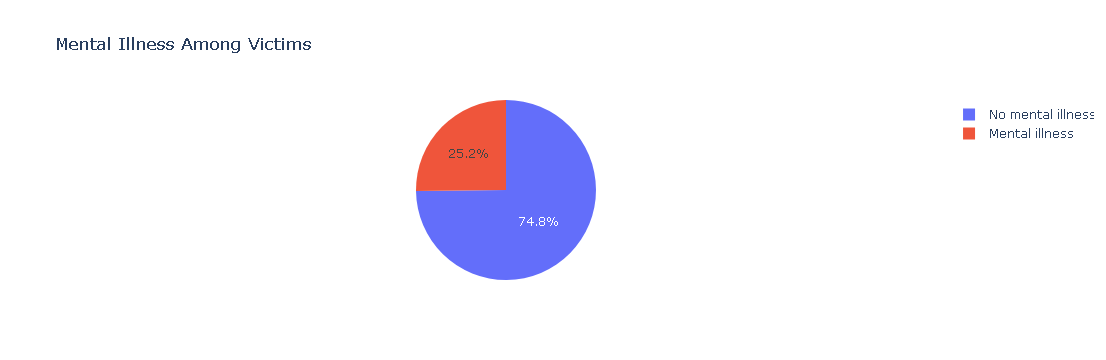

In [35]:
# Pie chart: mental illness presence among victims
fig = px.pie(
    names=['No mental illness', 'Mental illness'],  # Category labels
    values=[
        mental_illness_counts.get(False,0),  # Count of False (no signs)
        mental_illness_counts.get(True,0)     # Count of True (signs present)
    ],
    title='Mental Illness Among Victims'
)
fig.show()

# What this shows:
# - Proportion of cases where mental illness was noted
# - Quick visual of how common this factor is
# - Highlights need for mental health crisis training

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [36]:
# Find top 10 cities with highest number of police killings
city_counts = df_fatalities['city'].value_counts().head(10).reset_index()  # Count per city, take top 10
city_counts.columns = ['city', 'count']  # Rename columns for plotting

# Why this matters:
# - Identifies hotspots for police violence
# - May correlate with city size, policing policies, crime rates
# - Useful for targeted reform efforts
# - Can compare against city demographics/population

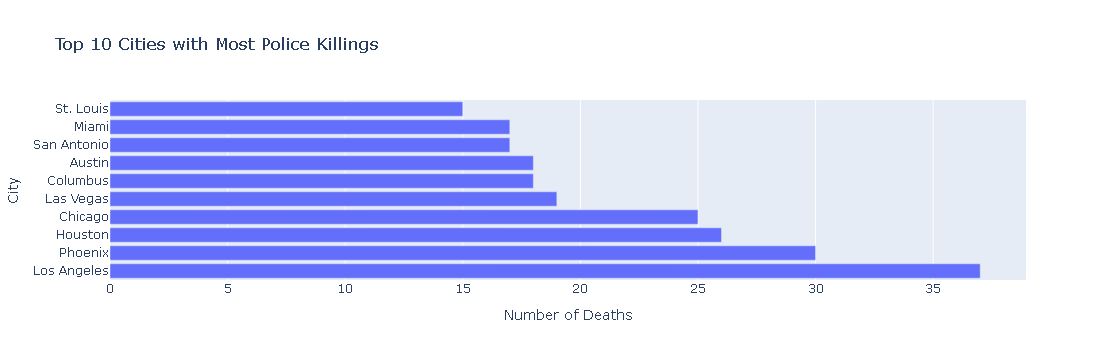

Most dangerous cities (by total killings):
       city  count
Los Angeles     37
    Phoenix     30
    Houston     26
    Chicago     25
  Las Vegas     19
   Columbus     18
     Austin     18
San Antonio     17
      Miami     17
  St. Louis     15


In [37]:
# Horizontal bar chart: top 10 cities by fatality count
fig = px.bar(
    city_counts, 
    x='count',           # Values on x-axis (horizontal length)
    y='city',            # Categories on y-axis (vertical stacking)
    orientation='h',     # Horizontal bars (easier to read city names)
    title='Top 10 Cities with Most Police Killings',
    labels={'count': 'Number of Deaths', 'city': 'City'}
)
fig.show()

# Print raw data as backup
print("Most dangerous cities (by total killings):")
print(city_counts.to_string(index=False))

# Why horizontal bars:
# - City names are long - horizontal gives more space
# - Easier to scan ranked list top to bottom
# - Length directly proportional to count
# - Interactive hover shows exact numbers

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [38]:
# Extract list of top 10 cities by fatality count
top_cities = city_counts['city'].tolist()  # Convert first column to Python list
print("Top 10 cities:", top_cities)

# Subset fatality data to only these top cities for focused analysis
top_cities_fatalities = df_fatalities[df_fatalities['city'].isin(top_cities)]  # Boolean filter
print(f"\nFatalities in top cities: {len(top_cities_fatalities)} rows")  # Check sample size

# Group by city and race to count victims in each race category per city
victim_race_by_city = top_cities_fatalities.groupby(['city', 'race']).size().reset_index(name='victim_count')
# .size() counts rows in each group, reset_index() makes it a DataFrame
print("\nVictim race counts per city:")
print(victim_race_by_city.head())

# --- Helper function: clean inconsistent city names for matching ---
def clean_city_name(city):
    """Remove common suffixes like ' city', ' town', ' CDP' from city names."""
    import re  # Regular expressions for pattern matching
    suffixes = r'\s+(city|town|village|cdp|census designated place|municipality|borough)$'  # Pattern
    cleaned = re.sub(suffixes, '', city, flags=re.IGNORECASE).strip()  # Replace suffix with empty string
    return cleaned

# Apply cleaning to both datasets for consistent joining
df_fatalities['city_clean'] = df_fatalities['city'].apply(clean_city_name)  # New column
df_share_race_city['city_clean'] = df_share_race_city['City'].apply(clean_city_name)  # New column
df_share_race_city['state'] = df_share_race_city['Geographic area']  # Alias for merging

# Filter census data to top cities using cleaned names
top_cities_clean = [clean_city_name(c) for c in top_cities]  # List comprehension
top_cities_census = df_share_race_city[df_share_race_city['city_clean'].isin(top_cities_clean)]
print(f"\nCensus entries for top cities (cleaned): {len(top_cities_census)} rows")

# Calculate total victims per city (denominator for percentages)
total_victims_per_city = top_cities_fatalities.groupby('city').size().reset_index(name='total_victims')

# Merge victim counts with totals to calculate percentages
victim_race_pct = pd.merge(victim_race_by_city, total_victims_per_city, on='city')  # SQL-style join
victim_race_pct['victim_pct'] = victim_race_pct['victim_count'] / victim_race_pct['total_victims'] * 100  # Percent

# Add state and cleaned city for merging with census
city_to_state = df_fatalities[df_fatalities['city'].isin(top_cities)][['city', 'state']].drop_duplicates().set_index('city')['state'].to_dict()
victim_race_pct['state'] = victim_race_pct['city'].map(city_to_state)  # Add state column
victim_race_pct['city_clean'] = victim_race_pct['city'].apply(clean_city_name)  # Add cleaned city

print("\nData preparation complete. Ready to merge with census.")

# Goal: Compare victim race percentages to city population percentages
# This will reveal if certain races are overrepresented among victims

Top 10 cities: ['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas', 'Columbus', 'Austin', 'San Antonio', 'Miami', 'St. Louis']

Fatalities in top cities: 222 rows

Victim race counts per city:
      city race  victim_count
0   Austin    B             3
1   Austin    H             2
2   Austin    W            13
3  Chicago    B            21
4  Chicago    H             1

Census entries for top cities (cleaned): 50 rows

Data preparation complete. Ready to merge with census.


In [39]:
# Prepare census race data for comparison
race_cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
census_race = top_cities_census.groupby(['city_clean', 'state'])[race_cols].mean().reset_index()
# Average across multiple census tracts within same city

# Convert wide format to long for easier joining
census_race_melted = census_race.melt(
    id_vars=['city_clean', 'state'],  # Keep these as identifiers
    var_name='race_census',            # Column names become values in this column
    value_name='population_pct'        # Values go here
)

# Map census race names (long names) to fatality race codes (single letters)
race_map = {
    'share_white': 'W', 
    'share_black': 'B', 
    'share_hispanic': 'H', 
    'share_asian': 'A', 
    'share_native_american': 'N'
}
census_race_melted['race'] = census_race_melted['race_census'].map(race_map)  # Add matching key column

# Merge victim percentages with population percentages
comparison = pd.merge(
    victim_race_pct,            # Left: victim data
    census_race_melted,         # Right: census data
    on=['city_clean', 'state', 'race'],  # Join on all three matching fields
    how='outer'                 # Keep all rows from both (catch mismatches)
)

# Filter down to clean comparison data
comparison = comparison[['city', 'race', 'victim_pct', 'population_pct', 'state']].dropna()
# Keep only essential columns, remove rows missing population data

print("\nComparison data after merge:")
print(comparison.head())

# Show comparison for each city
if len(comparison) == 0:
    print("\nNo matching data found after merge.")
else:
    for city in comparison['city'].unique():
        city_data = comparison[comparison['city'] == city]
        print(f"\n{city}:")
        display_df = city_data[['race', 'victim_pct', 'population_pct']].round(2)  # Format to 2 decimals
        print(display_df.to_string(index=False))

# Expected insight: Compare victim_pct vs population_pct
# If victim_pct > population_pct: race overrepresented in killings
# If victim_pct < population_pct: race underrepresented


Comparison data after merge:
       city race  victim_pct  population_pct state
11   Austin    B       16.67            3.00    MN
12   Austin    H       11.11           15.40    MN
14   Austin    W       72.22           86.80    MN
31  Chicago    B       84.00           32.90    IL
32  Chicago    H        4.00           28.90    IL

Austin:
race  victim_pct  population_pct
   B       16.67            3.00
   H       11.11           15.40
   W       72.22           86.80

Chicago:
race  victim_pct  population_pct
   B       84.00           32.90
   H        4.00           28.90
   W        8.00           45.00

Columbus:
race  victim_pct  population_pct
   B       55.56           60.00
   W       33.33           37.40

Houston:
race  victim_pct  population_pct
   A        3.85            0.60
   B       57.69            0.40
   H       19.23            3.30
   N        3.85            6.70
   W       11.54           82.20

Las Vegas:
race  victim_pct  population_pct
   B       15.79  

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

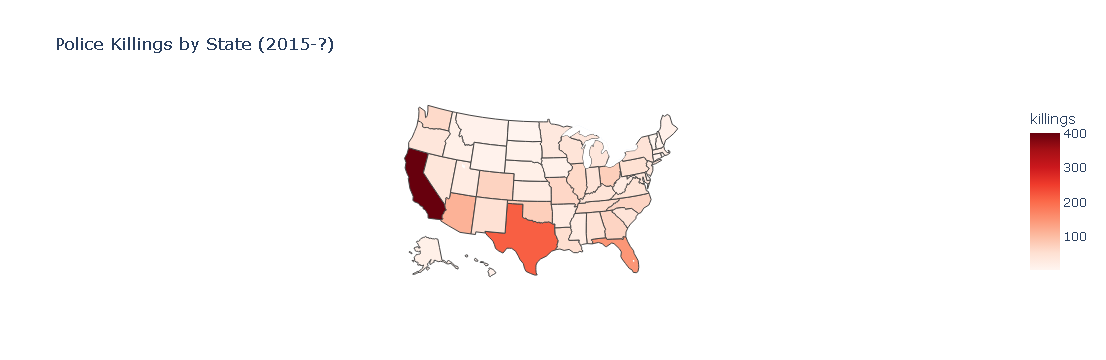

In [40]:
# Aggregate fatalities by state for mapping
state_killings = df_fatalities['state'].value_counts().reset_index()  # Count per state
state_killings.columns = ['state', 'killings']  # Rename columns

# Create choropleth map (color-coded by state)
fig = px.choropleth(
    state_killings, 
    locations='state',           # Column with state codes
    locationmode='USA-states',    # Interpret locations as US state abbreviations
    color='killings',             # Column determining color intensity
    scope='usa',                  # Only show USA (not entire North America)
    title='Police Killings by State (2015-?)',
    color_continuous_scale='Reds'  # Color gradient: lighter = fewer, darker = more
)
fig.show()

# What this reveals:
# - Geographic patterns in police killings
# - Darker states have higher counts
# - May correlate with population, policies, or reporting
# - Quick visual of national distribution

In [41]:
# Merge killings data with poverty data to find correlations
# poverty_by_state should exist from earlier analysis

state_comparison = pd.merge(
    state_killings,           # Left: killings by state
    poverty_by_state,          # Right: poverty rates by state
    left_on='state',           # Join key in left table
    right_on='state',          # Join key in right table
    how='left'                 # Keep all states (even if poverty data missing)
)
state_comparison = state_comparison.sort_values('killings', ascending=False)  # Highest first
print("Top 10 states by killings:")
print(state_comparison.head(10)[['state', 'killings', 'avg_poverty_rate']])

# Identify states in top quartile (top 25%) for both metrics
high_poverty_states = poverty_by_state[
    poverty_by_state['avg_poverty_rate'] > poverty_by_state['avg_poverty_rate'].quantile(0.75)
]['state'].tolist()  # States with poverty > 75th percentile

high_killing_states = state_killings[
    state_killings['killings'] > state_killings['killings'].quantile(0.75)
]['state'].tolist()  # States with killings > 75th percentile

# Find intersection of both lists
overlap = set(high_poverty_states) & set(high_killing_states)
print(f"\nStates in top quartile for both killings and poverty: {overlap}")

# Why this matters:
# - Tests if poverty correlates with police killings
# - Overlap suggests socioeconomic factors play role
# - Identifies states needing both economic and police reform

Top 10 states by killings:
  state  killings  avg_poverty_rate
0    CA       404             17.12
1    TX       215             19.92
2    FL       148             17.57
3    AZ       113             25.67
4    OH        76             14.85
5    OK        76             20.66
6    CO        70             13.36
7    NC        68             19.75
8    GA        68             23.78
9    MO        64             20.11

States in top quartile for both killings and poverty: {'TX', 'GA', 'OK', 'MO', 'AZ'}


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [42]:
# Convert date column from string to proper datetime format with explicit format
# This fixes the UserWarning about format inference
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='mixed')  # Handles multiple formats

# Extract year and month components for time-based analysis
df_fatalities['year'] = df_fatalities['date'].dt.year        # Extract just the year
df_fatalities['month'] = df_fatalities['date'].dt.to_period('M')  # Year-month period (e.g., '2015-01')

print("Date conversion complete.")
print(f"Date range: {df_fatalities['date'].min()} to {df_fatalities['date'].max()}")  # Show time span

# Why this matters:
# - Enables trend analysis over time
# - Can spot increases/decreases month by month
# - Identify seasonal patterns
# - Check data coverage/completeness

Date conversion complete.
Date range: 2015-01-03 00:00:00 to 2017-12-07 00:00:00


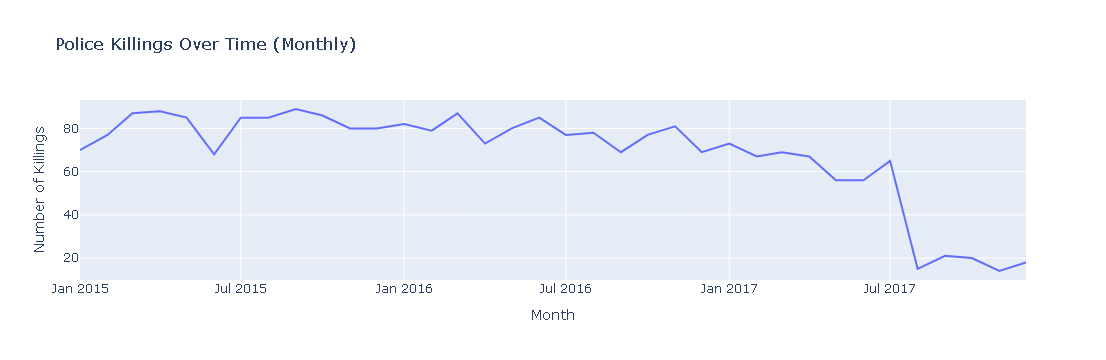

In [43]:
# Count fatalities by month for time series
monthly_counts = df_fatalities.groupby('month').size().reset_index(name='count')  # Group by month, count rows
monthly_counts['month'] = monthly_counts['month'].astype(str)  # Convert period objects to strings for plotting

# Create line chart showing trend over time
fig = px.line(
    monthly_counts, 
    x='month',           # Time on x-axis
    y='count',           # Fatality count on y-axis
    title='Police Killings Over Time (Monthly)',
    labels={'count': 'Number of Killings', 'month': 'Month'}
)
fig.show()

# What this reveals:
# - Upward/downward trends over time
# - Seasonal patterns (summer vs winter)
# - Spikes after specific events
# - Overall stability or change

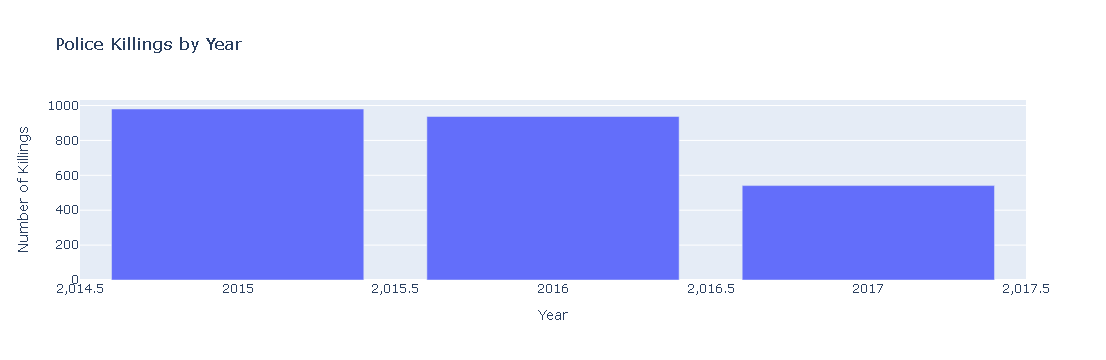

In [44]:
# Count fatalities by year for annual comparison
yearly_counts = df_fatalities.groupby('year').size().reset_index(name='count')  # Group by year, count rows

# Bar chart showing year-to-year changes
fig = px.bar(
    yearly_counts, 
    x='year',            # Year on x-axis
    y='count',           # Fatality count on y-axis
    title='Police Killings by Year',
    labels={'count': 'Number of Killings', 'year': 'Year'}
)
fig.show()

# What this reveals:
# - Annual totals at a glance
# - Year-over-year increases/decreases
# - Data completeness (partial years lower)
# - Long-term trends

In [45]:
# Calculate 6-month rolling average to smooth out noise
monthly_counts['rolling_avg'] = monthly_counts['count'].rolling(window=6).mean()
# window=6 means average of current month + previous 5 months
# Helps identify underlying trends by reducing monthly fluctuations

print("Rolling average computed.")
print(monthly_counts.head(10))  # First rows (initial months have NaN for rolling avg)

Rolling average computed.
     month  count  rolling_avg
0  2015-01     70          NaN
1  2015-02     77          NaN
2  2015-03     87          NaN
3  2015-04     88          NaN
4  2015-05     85          NaN
5  2015-06     68        79.17
6  2015-07     85        81.67
7  2015-08     85        83.00
8  2015-09     89        83.33
9  2015-10     86        83.00


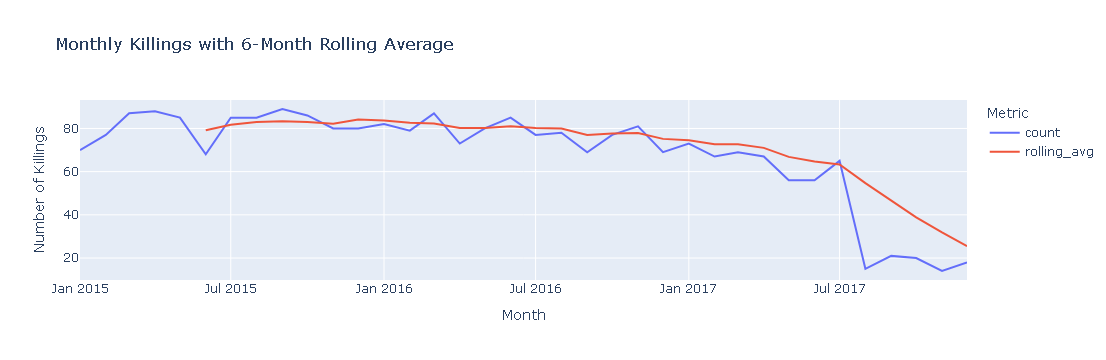

In [46]:
# Plot monthly counts with rolling average overlay
fig = px.line(
    monthly_counts, 
    x='month',                     # Time on x-axis
    y=['count', 'rolling_avg'],     # Plot both raw and smoothed lines
    title='Monthly Killings with 6-Month Rolling Average',
    labels={
        'value': 'Number of Killings',  # y-axis label
        'month': 'Month',                # x-axis label  
        'variable': 'Metric'             # Legend title
    }
)
fig.show()

# Why both lines:
# - Raw count shows actual monthly variation (noisy)
# - Rolling average reveals underlying trend (smooth)
# - Compare to see if changes are real or random

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [47]:
# Just a markdown cell, no code needed.
print("Read the Washington Post analysis at: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/")

Read the Washington Post analysis at: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/
